<a href="https://colab.research.google.com/github/marinaefstratiou/ml_notebooks/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load the dataset


In [1]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


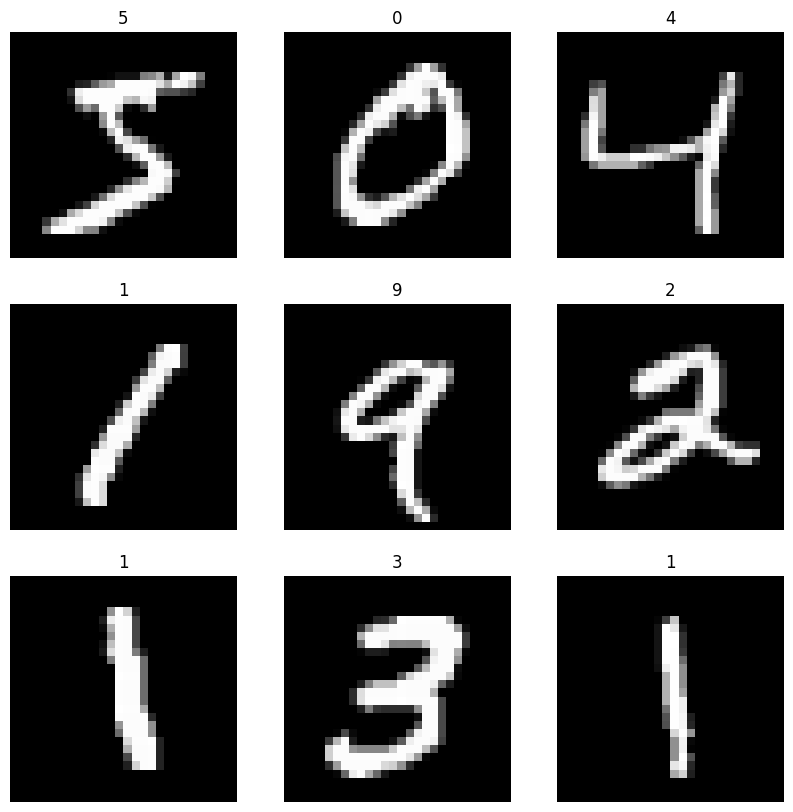

In [2]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
      ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
      ax.axis('off')
      ax.set_title(train_y[i])

#plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))


# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
  # pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  # pyplot.show()

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [56]:
def make_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))


  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation = 'softmax'))
  return model
model = make_model()


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [58]:
#Specify cost and loss
#will use Adam optimizer for this
#Adam: provides adaptive learning, rates, momentum (accelerates gradients in the right direction) and bias correction
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
##do not use from_logits = True for the compile because
#from_logits=True, the output of your model should be raw logits, not probabilities
#either use softmax or from_logits = True

#The difference between sparse_categorical_crossentropy and categorical_crossentropy is whether your targets are one-hot encoded.
#If it has been one-hot encoded we should use categorical_crossentropy loss function.

model= make_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-3), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


#Train on data to minimize loss
#epochs: During each epoch, the model sees the entire dataset, usually in batches,
#to update its parameters (weights and biases) via optimization algorithms
#like stochastic gradient descent (SGD) or Adam.


from sklearn.model_selection import KFold

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Implement K-Fold Cross-Validation
kf = KFold(n_splits=2, shuffle=True, random_state=42)
for train_index, val_index in kf.split(train_X):
    X_train_kf, X_val_kf = train_X[train_index], train_X[val_index]
    y_train_kf, y_val_kf = train_y[train_index], train_y[val_index]


    model.fit(X_train_kf, y_train_kf, epochs=10, batch_size=64, validation_data=(X_val_kf, y_val_kf), callbacks=[early_stopping, reduce_lr])

Epoch 1/10
469/469 [==============================] - 31s 62ms/step - loss: 0.4301 - accuracy: 0.8983 - val_loss: 0.1079 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0806 - accuracy: 0.9757 - val_loss: 0.0754 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0510 - accuracy: 0.9838 - val_loss: 0.1017 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0724 - val_accuracy: 0.9789 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0712 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 32s 67ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0685 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 7/10
469/469 [==============================] - 29s 

In [63]:
test_loss, test_acc = model.evaluate(test_X, test_y, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming model.predict outputs probabilities for each class
predictions = model.predict(test_X)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_y, predicted_classes)

313/313 - 2s - loss: 0.0450 - accuracy: 0.9906 - 2s/epoch - 7ms/step
Test accuracy: 0.9905999898910522, Test loss: 0.04499809071421623
313/313 [==============================] - 2s 8ms/step


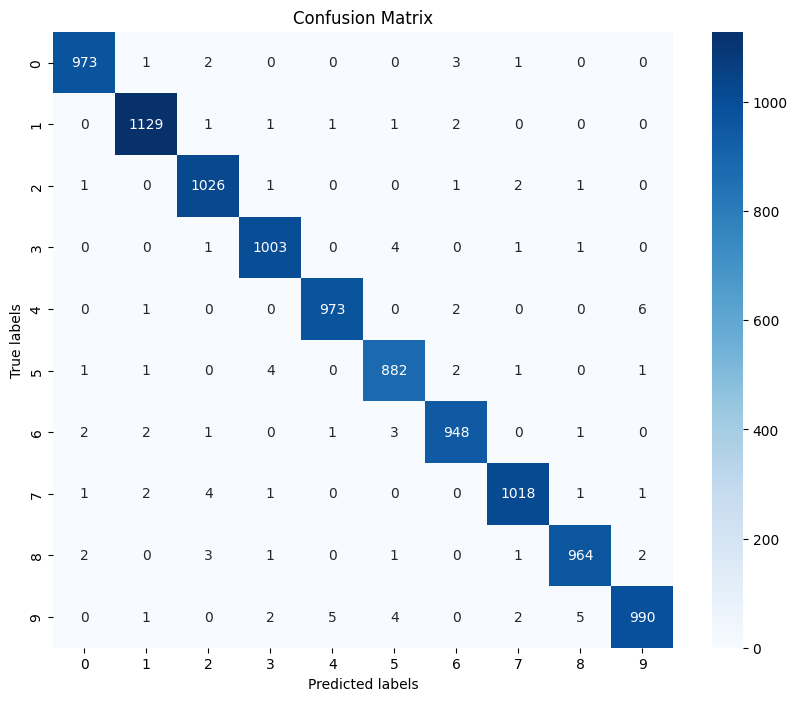

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()